In [1]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import csv
import os, sys
import dill
import seaborn as sns

In [2]:
from nltk.tokenize import RegexpTokenizer
# re_tokenizer = RegexpTokenizer(r'\w+')
re_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# NLP Pre-processing Test

## Get Article Text

In [3]:
alnc_path = '/Users/nknezek/Documents/Insight Local Folder/regional news/ALNC/Cleaned/NewspaperMapCorpus_03_03_2014_cleaned/'

In [69]:
filepath2 = alnc_path+'CA/Berkeley/www.berkeleydailyplanet.com/7-7-11-article0.cleaned'

In [15]:
filepath1 = alnc_path+'AK/Anchorage/www.adn.com/7-7-11-article1.cleaned'
with open(filepath1, 'r') as content_file:
    article = content_file.read()

## Tokenize

In [44]:
tokens = re_tokenizer.tokenize(article.lower())
tokens

['july',
 'august',
 'sept',
 'fly',
 'august',
 'sept',
 'fly',
 'out',
 'haul',
 'road',
 'can',
 'harvest',
 'caribou',
 'wolf',
 'hunts',
 'discounted',
 'to',
 'lowest',
 'price',
 'avail',
 'moose',
 'and',
 'sheep',
 'hunts',
 'also',
 'discounted',
 'save',
 'your',
 'spot',
 'call',
 'today',
 'arrowheadoutfitters',
 'com',
 'emailafriend']

## Clean Stopwords

In [4]:
from nltk.corpus import stopwords

In [46]:
cleaned_tokens = []
stop_words = set(stopwords.words('english'))
for token in tokens:
    if token not in stop_words:
        cleaned_tokens.append(token)

In [47]:
cleaned_tokens

['july',
 'august',
 'sept',
 'fly',
 'august',
 'sept',
 'fly',
 'haul',
 'road',
 'harvest',
 'caribou',
 'wolf',
 'hunts',
 'discounted',
 'lowest',
 'price',
 'avail',
 'moose',
 'sheep',
 'hunts',
 'also',
 'discounted',
 'save',
 'spot',
 'call',
 'today',
 'arrowheadoutfitters',
 'com',
 'emailafriend']

## Stemming / Lemmatization

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()

In [49]:
stemmed_tokens = []
# lemmatized_tokens = []

for token in cleaned_tokens:
    stemmed_tokens.append(snowball.stem(token))
#     lemmatized_tokens.append(lemmatizer.lemmatize(token))

In [363]:
lemmatizer.lemmatize('best')

'best'

In [50]:
# lemmatized_tokens

In [51]:
stemmed_tokens

['juli',
 'august',
 'sept',
 'fli',
 'august',
 'sept',
 'fli',
 'haul',
 'road',
 'harvest',
 'caribou',
 'wolf',
 'hunt',
 'discount',
 'lowest',
 'price',
 'avail',
 'moos',
 'sheep',
 'hunt',
 'also',
 'discount',
 'save',
 'spot',
 'call',
 'today',
 'arrowheadoutfitt',
 'com',
 'emailafriend']

## Count Vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [53]:
# stem our example article
stemmed_article = ' '.join(wd for wd in stemmed_tokens)

# performe a count-based vectorization of the document
article_vect = vectorizer.fit_transform([stemmed_article])

In [54]:
article_vect

<1x24 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [56]:
freqs = [(word, article_vect.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
print('top 5 words for article')
print( sorted (freqs, key = lambda x: -x[1])[0:5])

top 5 words for article
[('august', 2), ('sept', 2), ('fli', 2), ('hunt', 2), ('discount', 2)]


## filter out proper nouns

In [7]:
from nltk.corpus import words

In [346]:
"udon" in words.words()

False

In [8]:
from nltk.corpus import wordnet

In [11]:
"betting" in wordnet.words()

True

## Pre-process pipeline

### Tokenize, remove stopwords, stem

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

month_names = ['january','february','march','april','may','june','july','august','september','october','november','december']
month_abbrv = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec','sept']
day_names = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday','sunday']
day_abbrv = ['sun','mon','tue','wed','thu','fri','sat','sun','tues','weds','th','fr']

stop_words = stop_words.union(month_names)
stop_words = stop_words.union(month_abbrv)
stop_words = stop_words.union(day_names)
stop_words = stop_words.union(day_abbrv)

In [16]:
def tokenize_article_content(text_string, tokenizer=None, stop_words=None, stemmer=None, verbose=False, ):
    """
    Simple preprocessing pipeline which uses RegExp, sets basic token requirements, and removes stop words.
    """
#     print('preprocessing article text...')

    # tokenizer, stops, and stemmer
    if tokenizer is None:
        tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    if stop_words is None:
        stop_words = set(stopwords.words('english'))  # can add more stop words to this set
    if stemmer is None:
        stemmer = SnowballStemmer('english')
    
    # process articles
    cleaned_tokens = []
    tokens = tokenizer.tokenize(text_string.lower())
    for token in tokens:
        if (token not in stop_words) and (token in wordnet.words()):
            if len(token) > 0 and len(token) < 20: # removes non words
                cleaned_tokens.append(stemmer.stem(token))
    # add process article
    if verbose:
        print('{} tokens found'.format(len(cleaned_tokens)))
    return ' '.join(wd for wd in cleaned_tokens)

# process articles
processed_article = tokenize_article_content(article, stop_words=stop_words)

In [17]:
processed_article

'fli fli haul road harvest caribou wolf lowest price avail moos sheep also save spot call today'

In [18]:
def tokenize_several_articles(file_list,tokenizer=None, stop_words=None, stemmer=None,verbose=False):
    clean_texts = []
    for file_path in file_list:
        try:
            with open(file_path, 'r') as content_file:
                raw_text = content_file.read()
            clean_texts.append(tokenize_article_content(raw_text, stop_words=stop_words))
        except:
            pass
    if verbose:
        print('{} articles cleaned'.format(len(file_list)))
    return clean_texts
    

In [19]:
state = 'AK/'
town = 'Anchorage/'
statetown = state+town
def get_filenames_for_town(alnc_path, statetown, verbose=False):
    papers = os.listdir(alnc_path+statetown)
    files_list = []
    for p in papers:
        files_p = os.listdir(alnc_path+statetown+p)
        files_list += [alnc_path+statetown+p+'/'+x for x in files_p]
    if verbose:
        print('{} files found for {}'.format(len(files_list),statetown))
    return files_list

file_list = get_filenames_for_town(alnc_path,statetown)
file_list[:4]

['/Users/nknezek/Documents/Insight Local Folder/regional news/ALNC/Cleaned/NewspaperMapCorpus_03_03_2014_cleaned/AK/Anchorage/www.thebristolbaytimes.com/2014-1-28-article38.cleaned',
 '/Users/nknezek/Documents/Insight Local Folder/regional news/ALNC/Cleaned/NewspaperMapCorpus_03_03_2014_cleaned/AK/Anchorage/www.thebristolbaytimes.com/2014-1-28-article28.cleaned',
 '/Users/nknezek/Documents/Insight Local Folder/regional news/ALNC/Cleaned/NewspaperMapCorpus_03_03_2014_cleaned/AK/Anchorage/www.thebristolbaytimes.com/2013-9-21-article1.cleaned',
 '/Users/nknezek/Documents/Insight Local Folder/regional news/ALNC/Cleaned/NewspaperMapCorpus_03_03_2014_cleaned/AK/Anchorage/www.thebristolbaytimes.com/2014-1-21-article60.cleaned']

In [23]:
def process_towns(alnc_path,statetowns,tokenizer=None, stop_words=None, stemmer=None,verbose=False):
    tokenized_articles = []
    labels = []
    for i,st in enumerate(statetowns):
        files = get_filenames_for_town(alnc_path,st,verbose=verbose)
        tokenized_articles += tokenize_several_articles(files,tokenizer=tokenizer, stop_words=stop_words, stemmer=stemmer)
        labels += [i]*len(files)
    return labels, tokenized_articles

In [ ]:
statetowns = ['AK/Anchorage/','CA/Berkeley/', 'TX/Denton/']

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
stemmer = SnowballStemmer('english')

labels,tokenized_articles = process_towns(alnc_path,statetowns,stop_words=stop_words,verbose=True)

14392 files found for AK/Anchorage/


In [193]:
len(tokenized_articles)

46958

In [199]:
# vectorize the articles and compute count matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer()
tfidf_article_matrix = tf_vectorizer.fit_transform(tokenized_articles)
print( tfidf_article_matrix.shape)

(46958, 115408)


In [203]:
dill.dump(tfidf_article_matrix,open('tfidf_3citytest.m','wb'))

# PCA of TF-IDF vectors

In [232]:
from sklearn import decomposition

In [329]:
pca = decomposition.TruncatedSVD(n_components=3)
pca.fit(tfidf_article_matrix)
X = pca.transform(tfidf_article_matrix)

In [330]:
X.shape

(46958, 3)

In [331]:
import ipyvolume as ipv

In [332]:
X.shape

(46958, 3)

In [333]:
len(labels)

46958

In [337]:
fig = ipv.figure()
colorvals = (np.array(labels[::1])+.05)/2.1
colors = plt.cm.Spectral(colorvals)
scatter = ipv.scatter(X[::1,0], X[::1,1], X[::1,2], marker='sphere',size=.3,color=colors[:,:3])
ipv.show()

In [338]:
ipv.save("3city_scatter.html")

# Train model

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [204]:
RANDOM_STATE = 777
X_train, X_test, y_train, y_test = train_test_split(tfidf_article_matrix, labels, test_size=0.2, random_state=RANDOM_STATE)

In [205]:
X_train.shape

(37566, 115408)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV

In [212]:
# Look up newton-cg. Naive bayes
estimator = LogisticRegression(class_weight='balanced',
                               solver='newton-cg',
                               multi_class='multinomial',
                               n_jobs=-1,
                               random_state=RANDOM_STATE)

In [215]:
grid = {
    'C': np.linspace(0.01, 0.99, 10)
}
classifier = GridSearchCV(estimator=estimator, param_grid=grid)
classifier.fit(X_train, y_train)
best_C = classifier.best_estimator_.C
print(best_C, classifier.best_score_)

0.99 0.9845871266570835


In [219]:
def plot_validation_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, param_range=np.linspace(.1, 1.0, 5)):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("C (1 / regularization strength)")
    plt.ylabel("Accuracy score")
    train_scores, test_scores = validation_curve(
        estimator, X, y, "C", cv=cv, n_jobs=n_jobs, param_range=param_range, scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.semilogx(param_range, train_scores_mean, 'o-', label="Training score",
                 color="darkorange")
    plt.fill_between(param_range, train_scores_mean - (2*train_scores_std),
                 train_scores_mean + (2*train_scores_std), alpha=0.2,
                 color="darkorange")
    plt.semilogx(param_range, test_scores_mean, 'o-', label="Cross-validation score",
                 color="navy")
    plt.fill_between(param_range, test_scores_mean - (2*test_scores_std),
                 test_scores_mean + (2*test_scores_std), alpha=0.2,
                 color="navy")

    plt.legend(loc="best")
    return plt

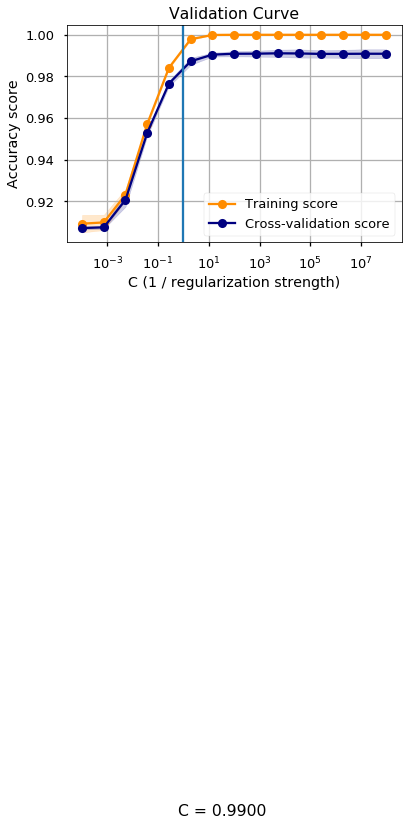

In [222]:
sns.set_context("talk", font_scale=1.0)
title = "Validation Curve"
plot_validation_curve(estimator,
                      title=title,
                      X=X_train,
                      y=y_train,
                      param_range=np.logspace(-4, 8, 15))
plt.axvline(x=best_C)
plt.text(0.61,0.625,"C = {0:.4f}".format(best_C))
plt.show()

In [223]:
plt.savefig('train_vs_cross_valid.pdf')

<Figure size 432x288 with 0 Axes>